<a href="https://colab.research.google.com/github/samnaveen1/Cellphone-Price-Prediction-App/blob/main/SMS_Spam_Collection%5BTask_4%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Internship /SMS Spam collection/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Drop columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
data.columns = ['label', 'message']

# Map labels to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [15]:
print(data.isnull().sum())
data.head()

label      0
message    0
dtype: int64


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0)


In [17]:
tfidf = TfidfVectorizer(max_features=5000)
#  training data
x_train_tfidf = tfidf.fit_transform(x_train)
#  test data
x_test_tfidf = tfidf.transform(x_test)


In [18]:
# train the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_tfidf, y_train)

# Predict and test the model
y_pred_lr = lr.predict(x_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9659192825112107
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       949
           1       1.00      0.77      0.87       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.96      1115



In [19]:
# train the SVM classifier
svm = SVC()
svm.fit(x_train_tfidf, y_train)
# Predict the model
y_pred_svm = svm.predict(x_test_tfidf)
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9775784753363229
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.85      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



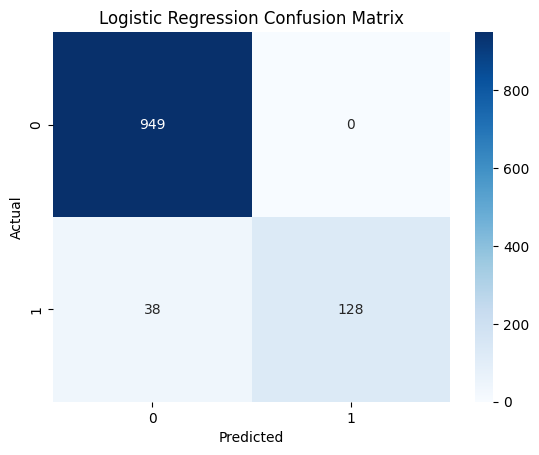

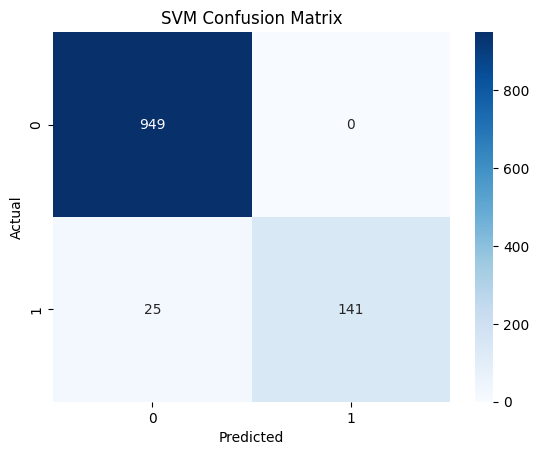

In [21]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
